# Proyek Klasifikasi Gambar: [Vegetable Image Dataset]
- **Nama:** [Pangeran Silaen]
- **Email:** [mc114d5y1975@student.devacademy.id]
- **ID Dicoding:** [MC114D5Y1975]

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install opendatasets
import zipfile, os
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
from sklearn.model_selection import train_test_split  # Untuk membagi dataset

import tensorflow as tf
from keras.models import Sequential
from keras.regularizers import l2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## Data Preparation

In [ ]:
od.download(
    'https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset'
)

Skipping, found downloaded files in ".\vegetable-image-dataset" (use force=True to force download)


In [ ]:
base_dir = 'vegetable-image-dataset/Vegetable Images/train'
os.listdir(base_dir)


['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [ ]:
base_path = 'vegetable-image-dataset/Vegetable Images/train/'
classes = os.listdir(base_path)

for cls in classes:
    image_count = len(os.listdir(os.path.join(base_path, cls)))
    print(f'Image {cls} amount: {image_count}')

Image Bean amount: 1000
Image Bitter_Gourd amount: 1000
Image Bottle_Gourd amount: 1000
Image Brinjal amount: 1000
Image Broccoli amount: 1000
Image Cabbage amount: 1000
Image Capsicum amount: 1000
Image Carrot amount: 1000
Image Cauliflower amount: 1000
Image Cucumber amount: 1000
Image Papaya amount: 1000
Image Potato amount: 1000
Image Pumpkin amount: 1000
Image Radish amount: 1000
Image Tomato amount: 1000


## Data Loading

In [ ]:
# Image Augmentation for duplicating image
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2
)



In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2
)

In [ ]:
# Misalnya, Anda menggunakan flow_from_directory untuk memuat data
train_generator = train_datagen.flow_from_directory(
    base_dir,  # Ganti dengan path data pelatihan Anda
    target_size=(224, 224), # Sesuaikan ukuran gambar
    batch_size=32,
    class_mode='categorical',     # Atau 'categorical' tergantung pada jenis masalah Anda
    subset = 'training'
)

test_generator = test_datagen.flow_from_directory(
    base_dir,   # Ganti dengan path data pengujian Anda
    target_size=(224, 224), # Sesuaikan ukuran gambar
    batch_size=32,
    class_mode='categorical',    # Atau 'categorical' tergantung pada jenis masalah Anda
    subset = 'validation'
)


Found 12000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
# 2. Cek struktur label
print("Class indices:", train_generator.class_indices)
print("Jumlah kelas:", train_generator.num_classes)

Class indices: {'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}
Jumlah kelas: 15


### Data Preprocessing

#### Split Dataset

In [ ]:
# Path ke direktori dataset
source_dir = 'vegetable-image-dataset/Vegetable Images'
train_dir = os.path.join(source_dir, 'train')
validation_dir = os.path.join(source_dir, 'validation')
test_dir = os.path.join(source_dir, 'test')

In [ ]:
# Menentukan rasio split
train_size = 0.7
validation_size = 0.2
test_size = 0.1

In [ ]:
# Menentukan kelas
categories = os.listdir(train_dir)

In [ ]:
# Membagi dataset menjadi train dan validation
for category in categories:
    category_path = os.path.join(train_dir, category)
    all_images = os.listdir(category_path)

    # Split data gambar untuk training dan validation
    train_images, val_images = train_test_split(all_images, train_size=train_size, random_state=42)

    # Membuat subfolder untuk val_images dan train_images jika belum ada
    os.makedirs(os.path.join(validation_dir, category), exist_ok=True)

    # Salin gambar ke folder yang sesuai
    for image in train_images:
        source_image = os.path.join(category_path, image)
        dest_image = os.path.join(train_dir, category, image)

        # Pastikan file belum ada sebelum menyalin
        if not os.path.exists(dest_image):
            shutil.copy(source_image, dest_image)

    for image in val_images:
        source_image = os.path.join(category_path, image)
        dest_image = os.path.join(validation_dir, category, image)

        # Pastikan file belum ada sebelum menyalin
        if not os.path.exists(dest_image):
            shutil.copy(source_image, dest_image)

print("✅ Data preprocessing dan split dataset selesai!")

✅ Data preprocessing dan split dataset selesai!


## Modelling

## MENGGUNAKAN MODEL CNN

In [ ]:
model_1 = Sequential()

# Convolutional layers
model_1.add(Conv2D(20, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model_1.add(Conv2D(20, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2), padding="valid"))
model_1.add(Dropout(0.3))  # Adding dropout to reduce overfitting

model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(Conv2D(50, (3, 3), activation="relu"))
model_1.add(MaxPool2D((2, 2)))
model_1.add(Dropout(0.3))  # Adding dropout to reduce overfitting

# Flatten layer and Dense output layer
model_1.add(Flatten())
model_1.add(Dense(15, activation="softmax"))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## CallBacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        if acc is not None and val_acc is not None:
            if acc >= 0.95 and val_acc >= 0.95:
                print(f"\n🎉 Training dihentikan karena akurasi training ({acc:.2f}) dan val ({val_acc:.2f}) >= 95%")
                self.model.stop_training = True

callback_95 = myCallback()

In [ ]:
# Compile the model
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"],
)

In [ ]:
history_1 = model_1.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[callback_95]
)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 545s 1s/step - accuracy: 0.3782 - loss: 1.9461 - val_accuracy: 0.7507 - val_loss: 0.7699
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 534s 1s/step - accuracy: 0.7949 - loss: 0.6424 - val_accuracy: 0.7913 - val_loss: 0.6107
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 528s 1s/step - accuracy: 0.8655 - loss: 0.4369 - val_accuracy: 0.8650 - val_loss: 0.4286
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 526s 1s/step - accuracy: 0.9134 - loss: 0.2830 - val_accuracy: 0.8997 - val_loss: 0.3300
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 547s 1s/step - accuracy: 0.9497 - loss: 0.1782 - val_accuracy: 0.8883 - val_loss: 0.3570
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 531s 1s/step - accuracy: 0.9430 - loss: 0.1747 - val_accuracy: 0.8987 - val_loss: 0.3464
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 540s 1s/step - accuracy: 0.9690 - loss: 0.1041 - val_accuracy: 0.9053 - val_loss: 0.3648
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 534s 1s/step - accuracy: 0.9642 - loss: 0.1096 - val_accu

In [ ]:
# Simpan model dalam format .keras
model_1.save("model_1.keras")
print("✅ Model berhasil disimpan dalam format .keras.")

✅ Model berhasil disimpan dalam format .keras.


## Evaluasi dan Visualisasi

In [ ]:
# 1️⃣ Evaluasi model_1 pada test set
test_loss, test_acc = model_1.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")
print(f"📉 Test Loss: {test_loss:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 422ms/step - accuracy: 0.8874 - loss: 0.4550

✅ Test Accuracy: 88.83%
📉 Test Loss: 0.4382


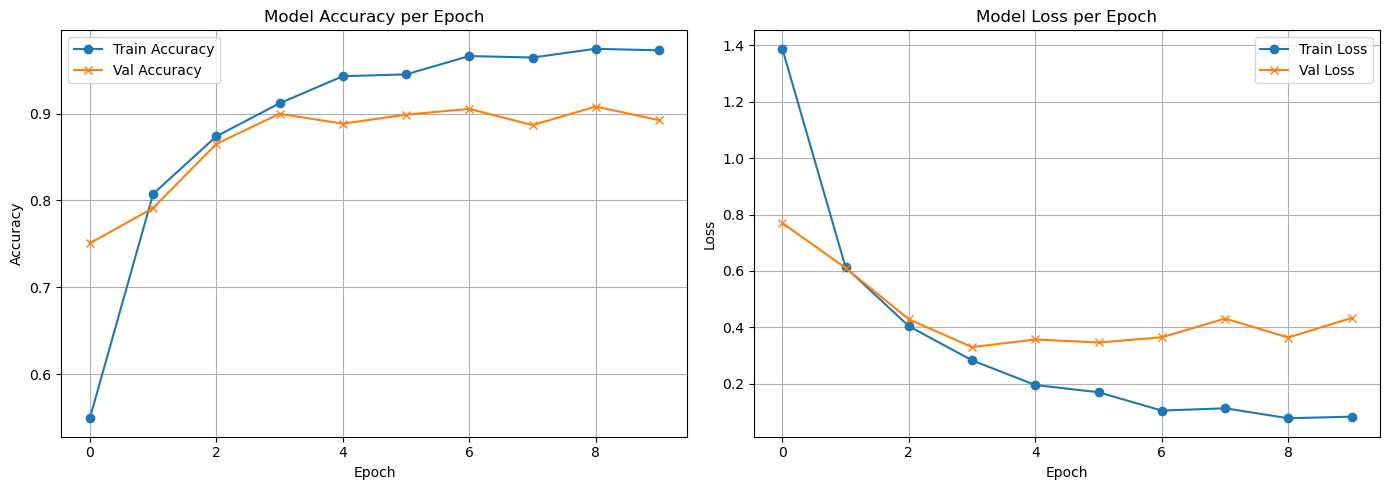

In [ ]:
# 📊 2. Visualisasi Akurasi dan Loss Selama Training
def plot_history(history):
    plt.figure(figsize=(14, 5))

    # Plot akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy", marker='o')
    plt.plot(history.history["val_accuracy"], label="Val Accuracy", marker='x')
    plt.title("Model Accuracy per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss", marker='o')
    plt.plot(history.history["val_loss"], label="Val Loss", marker='x')
    plt.title("Model Loss per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Panggil fungsi visualisasi dengan history_1
plot_history(history_1)


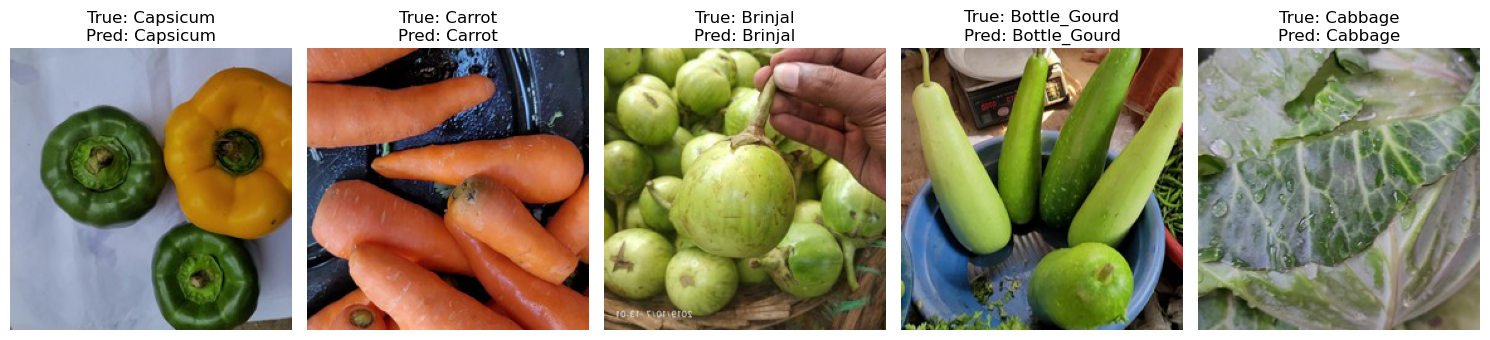

In [ ]:
def display_random_predictions(generator, model, class_names, num_images=5):
    # Ambil batch
    generator.reset()
    x_batch, y_batch = next(generator)

    # Pilih index gambar secara acak dari batch
    indices = np.random.choice(range(len(x_batch)), num_images, replace=False)

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        img = x_batch[idx]
        true_label = np.argmax(y_batch[idx])
        prediction = model.predict(np.expand_dims(img, axis=0), verbose=0)
        predicted_label = np.argmax(prediction)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)  # Tidak perlu ubah ke uint8 jika sudah dalam [0,1]
        plt.axis('off')
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}")

    plt.tight_layout()
    plt.show()

# Daftar nama kelas
class_names = list(train_generator.class_indices.keys())  # atau bisa didefinisikan manual

# Panggil fungsi untuk menampilkan 5 gambar acak dari test set
display_random_predictions(test_generator, model_1, class_names, num_images=5)


94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 429ms/step


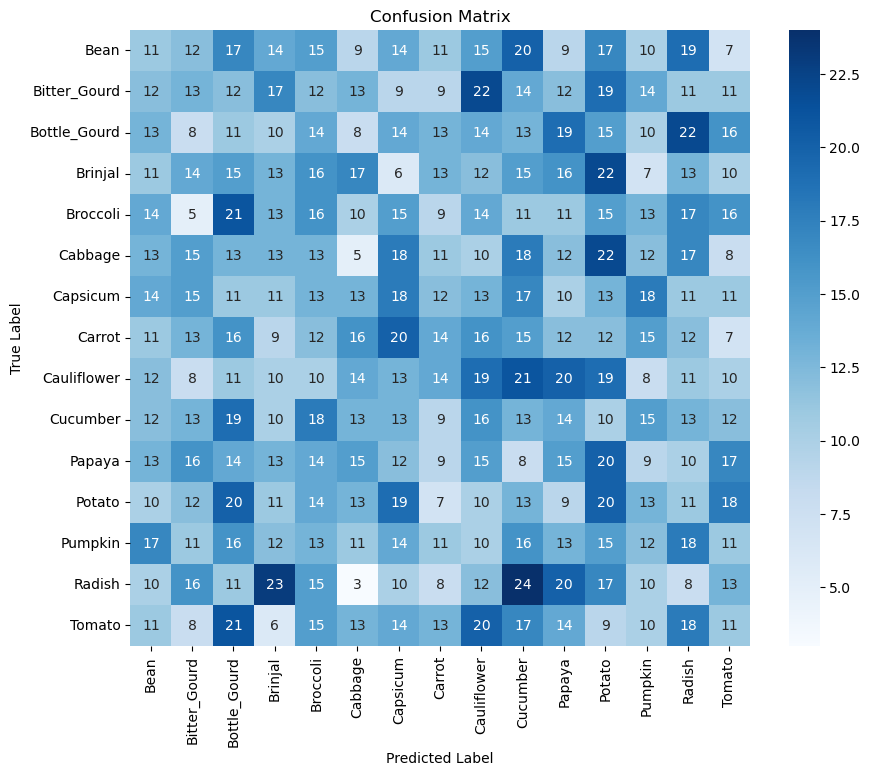

In [ ]:
# 🧾 3. Confusion Matrix
# Prediksi hasil dari test set
Y_pred = model_1.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Label sebenarnya
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Konversi Model

In [ ]:
# Asumsi model hasil training disimpan dalam variabel ini:
model_1
class_names = train_generator.class_indices.keys()

In [ ]:
#🧾 1. Simpan Model sebagai SavedModel

saved_model_dir = "submission/saved_model"
os.makedirs(saved_model_dir, exist_ok=True)

# Simpan model ke format SavedModel (untuk TFLite dan TFJS)
model_1.export(saved_model_dir)

print("✅ Model berhasil disimpan sebagai SavedModel.")

INFO:tensorflow:Assets written to: submission/saved_model\assets


INFO:tensorflow:Assets written to: submission/saved_model\assets


Saved artifact at 'submission/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  2903580931472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903555595856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903580928400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903580933200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903587995728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903587997264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903587997072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903587997840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903587998224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903587999568: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model berhasil disimpan seb

In [ ]:
# 2Konversi ke TensorFlow Lite (TFLite)

# Tentukan lokasi model TFLite
tflite_model_dir = "submission/tflite"
os.makedirs(tflite_model_dir, exist_ok=True)

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model_1)
tflite_model = converter.convert()

# Simpan file model.tflite
with open(os.path.join(tflite_model_dir, "model.tflite"), 'wb') as f:
    f.write(tflite_model)
print("✅ Model berhasil dikonversi ke TFLite dan disimpan di:", tflite_model_dir)

# Jika kamu juga membutuhkan label.txt
labels = class_names  # Gantilah dengan nama kelas sesuai dataset kamu
with open(os.path.join(tflite_model_dir, "label.txt"), 'w') as label_file:
    for label in labels:
        label_file.write(f"{label}\n")
print("✅ label.txt telah dibuat.")

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmppdm37hzt\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmppdm37hzt\assets


Saved artifact at 'C:\Users\User\AppData\Local\Temp\tmppdm37hzt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  2903580931472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903555595856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903580928400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903580933200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903587995728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903587997264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903587997072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903587997840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903587998224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2903587999568: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model

In [17]:
import tensorflowjs as tfjs

# Tentukan direktori output untuk model TensorFlow.js
tfjs_model_dir = '/content/tfjs_model'

# Buat folder untuk menyimpan model TensorFlow.js jika belum ada
os.makedirs(tfjs_model_dir, exist_ok=True)

# Konversi model Keras ke format TensorFlow.js
tfjs.converters.save_keras_model(model, tfjs_model_dir)

failed to lookup keras version from the file,
    this is likely a weight only file


In [18]:
import shutil

# Membuat file zip dari folder tfjs_model
shutil.make_archive('/content/tfjs_model', 'zip', '/content/tfjs_model')


'/content/tfjs_model.zip'

## Inference (Optional)

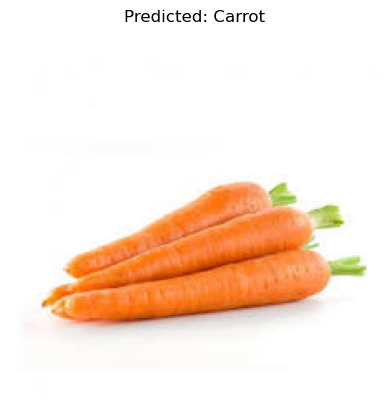


Probabilitas prediksi:
Bean: 0.0000
Bitter_Gourd: 0.0000
Bottle_Gourd: 0.0000
Brinjal: 0.0000
Broccoli: 0.0000
Cabbage: 0.0000
Capsicum: 0.0000
Carrot: 0.9928
Cauliflower: 0.0000
Cucumber: 0.0000
Papaya: 0.0000
Potato: 0.0070
Pumpkin: 0.0000
Radish: 0.0000
Tomato: 0.0002


In [ ]:
# Load SavedModel via TFSMLayer
layer = TFSMLayer('submission/saved_model', call_endpoint='serving_default')
model = Sequential([layer])

# Muat gambar uji
img_path = 'carrot.jpg'  # Ganti sesuai nama file gambar uji kamu
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalisasi

# Lakukan prediksi
output = model(img_array)
if isinstance(output, dict):
    output = list(output.values())[0]
predictions = output.numpy()[0]

# Label kelas (15 kelas tanpa duplikat)
class_names = [
    "Bean", "Bitter_Gourd", "Bottle_Gourd", "Brinjal",'Broccoli', "Cabbage",
    "Capsicum", "Carrot", "Cauliflower", "Cucumber", "Papaya",
    "Potato", "Pumpkin", "Radish", "Tomato"
]

# Ambil hasil prediksi
predicted_class = class_names[np.argmax(predictions)]

# Tampilkan gambar dan hasil prediksi
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()

# Tampilkan semua skor
print("\nProbabilitas prediksi:")
for i, score in enumerate(predictions):
    print(f"{class_names[i]}: {score:.4f}")
